In [1]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from ultron.factor.genetic.geneticist.operators import calc_factor
from lumina.genetic.metrics.evaluate import FactorEvaluate

In [3]:
from kdutils.common import fetch_temp_data,fetch_temp_returns

In [4]:
method = 'aicso0'
instruments = 'ims'
task_id = '200037'


In [5]:
name = ['train', 'val', 'test']
total_data = fetch_temp_data(
    method=method,
    task_id=task_id,
    instruments=instruments,
    datasets=name if isinstance(name, list) else [name])

total_returns = fetch_temp_returns(
    method=method,
    task_id=task_id,
    instruments=instruments,
    datasets=name if isinstance(name, list) else [name],
    category='returns')


./records/aicso0/ims/level2/train_data.feather
./records/aicso0/ims/level2/val_data.feather


./records/aicso0/ims/level2/test_data.feather
./records/aicso0/ims/returns/train_returns.feather
./records/aicso0/ims/returns/val_returns.feather
./records/aicso0/ims/returns/test_returns.feather


In [6]:
total_data

,trade_time,symbol,open,high,low,close,volume,money,twap,pct_change,...,price_imbalance_3,price_imbalance_4,depth_imbalance_0,depth_imbalance_1,depth_imbalance_2,depth_imbalance_3,depth_imbalance_4,ask_bid_press,realized_volatility,code
0,2022-07-25 09:31:00,IM2208,6971.8,6994.8,6964.4,6973.8,602,8.405459e+08,6981.585000,0.000287,...,-0.000548,-0.000727,0.048350,0.032361,0.080896,0.116902,-0.009520,0.191198,0.002546,IM
1,2022-07-25 09:32:00,IM2208,6973.8,6995.2,6969.6,6982.8,428,5.976718e+08,6982.126050,0.001291,...,-0.000485,-0.000618,0.077734,0.073275,0.029830,0.017027,0.020993,0.243969,0.001839,IM
2,2022-07-25 09:33:00,IM2208,6982.8,6989.8,6981.6,6989.8,280,3.911952e+08,6985.326496,0.001002,...,-0.000393,-0.000494,0.072032,0.123311,0.126821,0.172182,0.129718,0.337424,0.001727,IM
3,2022-07-25 09:34:00,IM2208,6989.6,6993.0,6982.6,6993.0,319,4.458736e+08,6988.716949,0.000486,...,-0.000357,-0.000442,-0.014664,-0.053867,0.042050,-0.065601,-0.069451,-0.099565,0.001665,IM
4,2022-07-25 09:35:00,IM2208,6993.6,7009.0,6991.8,7002.2,284,3.976598e+08,6999.337288,0.001230,...,-0.000445,-0.000558,0.056584,0.106953,0.097129,0.101817,0.024232,0.132744,0.001700,IM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15310,2025-03-13 14:56:00,IM2503,6428.0,6433.0,6427.2,6429.2,932,1.198556e+09,6429.525000,0.000187,...,-0.000153,-0.000191,-0.038140,0.010304,-0.040021,-0.093979,-0.079122,-0.191060,0.000548,IM
15311,2025-03-13 14:57:00,IM2503,6428.8,6431.2,6428.8,6429.2,663,8.525822e+08,6429.686667,0.000062,...,-0.000128,-0.000163,0.002758,-0.278253,-0.193086,-0.099232,-0.034022,-0.300212,0.000336,IM
15312,2025-03-13 14:58:00,IM2503,6429.4,6431.8,6429.2,6429.4,731,9.401416e+08,6430.576667,0.000000,...,-0.000119,-0.000150,-0.168945,-0.337697,-0.269017,-0.116008,-0.093157,-0.511690,0.000256,IM
15313,2025-03-13 14:59:00,IM2503,6429.2,6430.6,6425.0,6425.0,952,1.223661e+09,6426.653333,-0.000653,...,-0.000133,-0.000166,0.030113,0.227378,0.011522,-0.065055,-0.081420,0.031883,0.000346,IM


In [7]:
total_data = total_data.sort_values(by=['trade_time', 'code'])
returns_data = total_returns.sort_values(by=['trade_time', 'code'])
total_data = total_data.set_index('trade_time')

In [8]:
expression = "MSKEW(20,'mci_imbalance')"
factor_data = calc_factor(expression=expression,
                              total_data=total_data,
                              key='code',
                              indexs=[])

In [9]:
factor_data = factor_data.replace([np.inf, -np.inf], np.nan)
factor_data['transformed'] = np.where(
        np.abs(factor_data.transformed.values) > 0.000001,
        factor_data.transformed.values, np.nan)
factor_data = factor_data.loc[factor_data.index.unique()[1:]]
factors_data1 = factor_data.reset_index()
total_data1 = factors_data1.merge(returns_data, on=['trade_time',
                                                    'code']).dropna()
#total_data1['transformed'] = 0 - total_data1['transformed']
total_data1.head()

,trade_time,transformed,code,nxt1_ret_1h,nxt1_ret_2h,nxt1_ret_3h,time_weight,equal_weight
2,2022-07-25 09:34:00,0.370571,IM,0.000579,0.001023,0.000546,0.000721,0.000716
3,2022-07-25 09:35:00,0.390715,IM,0.000445,-0.000033,0.000962,0.000372,0.000458
4,2022-07-25 09:36:00,-0.079668,IM,-0.000478,0.000517,0.000681,0.000047,0.000240
5,2022-07-25 09:37:00,-0.261641,IM,0.000995,0.001158,0.000215,0.000919,0.000789
6,2022-07-25 09:38:00,-0.260087,IM,0.000163,-0.000780,-0.002839,-0.000651,-0.001152


In [12]:
ret_name = 'equal_weight'
roll_win = 240
fee = 0.0
scale_method = 'roll_min_max'
MyFactorBacktest = FactorEvaluate(
    factor_data=total_data1,
    factor_name='transformed',
    ret_name=ret_name,
    roll_win=roll_win,  # 因子放缩窗口，自定义
    fee=fee,
    scale_method=scale_method)
result = MyFactorBacktest.run()
result

{'total_ret': -0.7464950807848527,
 'avg_ret': -8.787625483404627e-06,
 'max_dd': -0.7670086807551715,
 'calmar': -0.9732550615331735,
 'sharpe': -0.2278567405075698,
 'turnover': 0.07040138183448622,
 'win_rate': 0.4983900989452372,
 'profit_ratio': 0.9395566936937157,
 'ic_mean': 0.0010884173332226757,
 'ic_std': 0.1049699415270877,
 'ic_ir': 0.010368847666184585}

<Axes: xlabel='trade_time'>

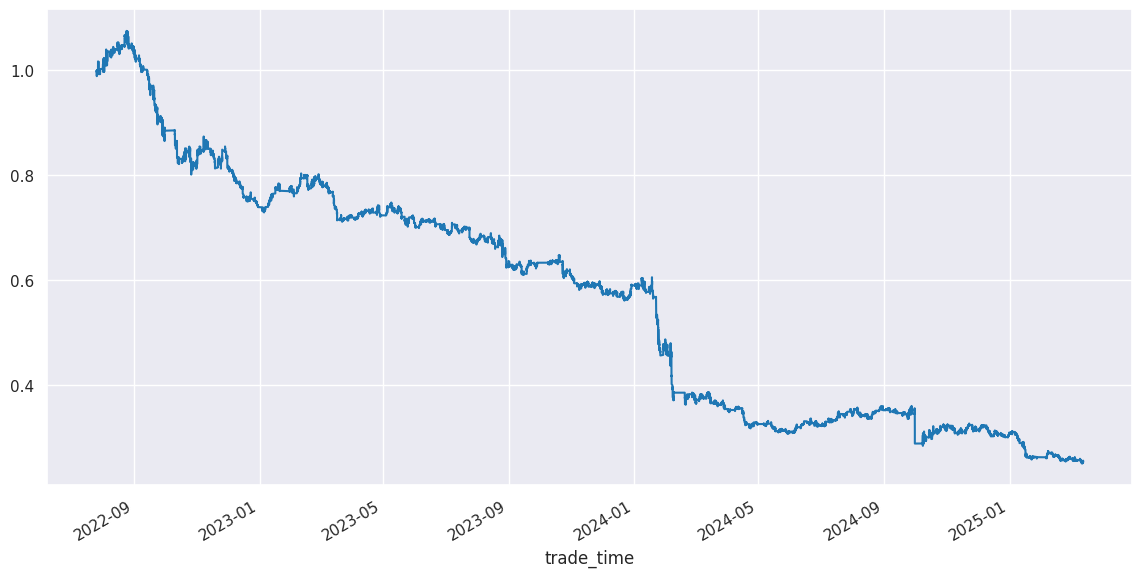

In [13]:
MyFactorBacktest.factor_data['nav'].plot(figsize=(14,7))